<a href="https://colab.research.google.com/github/xvmon234-ai/Learning-Python/blob/main/Financial_Risk_Prediction/03_EDA_Visualization/EDA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **탐색적 데이터 분석(EDA) 및 시각화**

이제 계산된 재무 비율 데이터를 활용하여 기업의 재무 상태를 시각적으로 탐색하고 분석할 차례입니다. 이 단계는 감사인이 재무제표의 숨겨진 패턴과 위험 신호를 파악하는 과정과 직결됩니다.


---

#### **1단계: 데이터 준비: 재무 데이터 재수집 및 비율 계산**

새로운 Colab 노트북을 시작하므로, 단계 1과 2에서 수행했던 데이터를 다시 불러오고 재무 비율을 계산하는 모든 과정을 한 번 더 실행해야 합니다.


In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# 1 단계: 데이터 수집
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
financial_data = {}

for ticker in tickers:
  try:
    stock = yf.Ticker(ticker)
    income_stmt = stock.income_stmt.T
    balance_sheet = stock.balance_sheet.T
    financial_data[ticker] = {'income_stmt': income_stmt, 'balance_sheet': balance_sheet} # 질문 01. 해당 내용에 대한 추가설명
  except Exception as e:
        print(f"{ticker}의 데이터를 불러오는 중 오류가 발생했습니다: {e}")

# 2 단계: 재무 비율 계산

calculated_ratios = {}

for ticker in tickers:
  if ticker in financial_data:
    income_df = financial_data[ticker]['income_stmt']
    balance_df = financial_data[ticker]['balance_sheet']

    # DataFrame 복사본을 생성하여 오류 방지
    income_df = income_df.copy()
    balance_df = balance_df.copy()

    # 각 기업별 재무 비율 계산
    ratios_df = pd.DataFrame(index=income_df.index)

    # 1. 유동성 비율 (Liquidity Ratios)
    # 유동비율 = 유동자산 / 유동부채: 단기 채무 지급 능력을 나타냄.
    ratios_df['CurrentRatio'] = balance_df['Current Assets'] / balance_df['Current Liabilities']

    # 당좌비율 = (유동자산 - 재고자산) / 유동부채: 재고를 제외한 엄격한 단기 지급 능력.
    # META의 경우 재고자산이 없으므로 재고자산을 0으로 간주하여 계산해야 함
    # 따라서 다음의 조건문을 활용
    if 'Inventory' in balance_df.columns:
      ratios_df['QuickRatio'] = (balance_df['Current Assets'] - balance_df['Inventory']) / balance_df['Current Liabilities']
    # 재고자산이 없는 경우
    # 업종에 따라서 이와 같은 경우가 존재할 수 있음을 유의해야함
    else:
      ratios_df['QuickRatio'] = balance_df['Current Assets'] / balance_df['Current Liabilities']

    # 2. 수익성 비율 (Profitability Ratios)
    # 매출총이익률 = 매출총이익 / 매출(OperatingRevenue): 주된 영업활동을 통해 얻은 수익성.
    ratios_df['GrossProfitMargin'] = income_df['Gross Profit'] / income_df['Operating Revenue']

    # 영업이익률 = 영업이익 / 매출(Operating Revenue): 핵심 사업의 효율성.
    ratios_df['OperatingProfitMargin'] = income_df['Operating Income'] / income_df['Operating Revenue']

    # 3. 레버리지 비율 (Leverage Ratios)
    # 부채비율 = 총부채 / 총자본(Common Stock Equity): 타인자본 의존도를 나타냄.
    ratios_df['DebtRatio'] = balance_df['Total Debt'] / balance_df['Common Stock Equity']

    # 계산된 재무 비율 저장
    calculated_ratios[ticker] = ratios_df

all_ratios_df = pd.concat(calculated_ratios, names=['Ticker', 'Date'])
all_ratios_df = all_ratios_df.reset_index()

# 데이터 확인
print("✅ 재무 비율 데이터 준비 완료.")
print(all_ratios_df.head())

✅ 재무 비율 데이터 준비 완료.
  Ticker       Date  CurrentRatio  QuickRatio  GrossProfitMargin  \
0   AAPL 2024-09-30      0.867313    0.826007           0.462063   
1   AAPL 2023-09-30      0.988012    0.944442           0.441311   
2   AAPL 2022-09-30      0.879356    0.847235           0.433096   
3   AAPL 2021-09-30      1.074553    1.022115           0.417794   
4   AAPL 2020-09-30           NaN         NaN                NaN   

   OperatingProfitMargin  DebtRatio  
0               0.315102   1.872327  
1               0.298214   1.787533  
2               0.302887   2.614462  
3               0.297824   2.163925  
4                    NaN        NaN  


> ### **데이터 저장 방식에 대한 조언**
> Colab에서 매번 데이터를 다시 불러오는 방식에 대한 고민은 매우 합리적입니다.
>
> * 장점 (매번 다시 불러오는 방식)
>
> 독립성: 각 .ipynb 파일이 독립적으로 실행될 수 있어, 특정 단계만 따로 테스트하고 싶을 때 편리합니다.
> 학습 효과: 반복적인 데이터 수집 및 전처리 과정을 통해 코드에 대한 이해도를 높일 수 있습니다.
>
> * 단점 (매번 다시 불러오는 방식)
>
> 비효율성: API 호출 시간이 길어지거나, 인터넷 연결이 불안정할 경우 작업 흐름이 끊길 수 있습니다. 데이터 양이 방대해지면 실행 시간이 매우 오래 걸릴 수 있습니다.
> 데이터 일관성 문제: API 데이터는 실시간으로 변동될 수 있어, 오늘 실행한 결과와 내일 실행한 결과가 미세하게 달라질 수 있습니다.
>
> * 조언:
>
> 현재 진행하고 있는 프로젝트는 데이터 양이 많지 않아 매번 다시 불러오는 방식이 큰 문제가 되지 않습니다. 하지만 향후 규모가 더 큰 프로젝트를 진행할 계획이라면, CSV 파일로 저장하는 것을 강력히 추천합니다.
>
> 지금은 두 방식의 장단점을 직접 경험해보는 차원에서 단계 3까지는 데이터를 다시 불러오는 방식으로 진행하시고, 이후에 프로젝트를 더 확장할 때 CSV 파일 저장 방식을 적용해 보면 좋을 것 같습니다.

# **2단계: 탐색적 데이터 분석(EDA) 및 시각화**

이제 준비된 `all_ratios_df`를 활용하여 시각적 분석을 시작합니다.





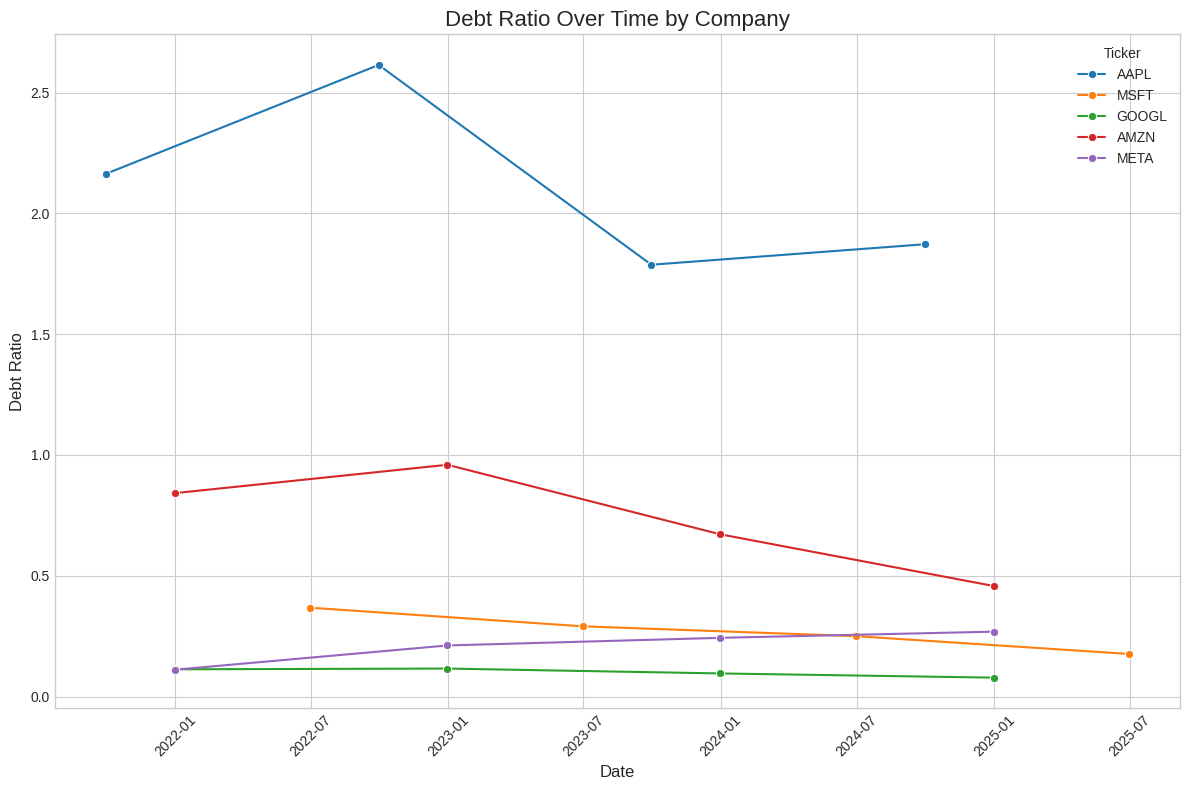

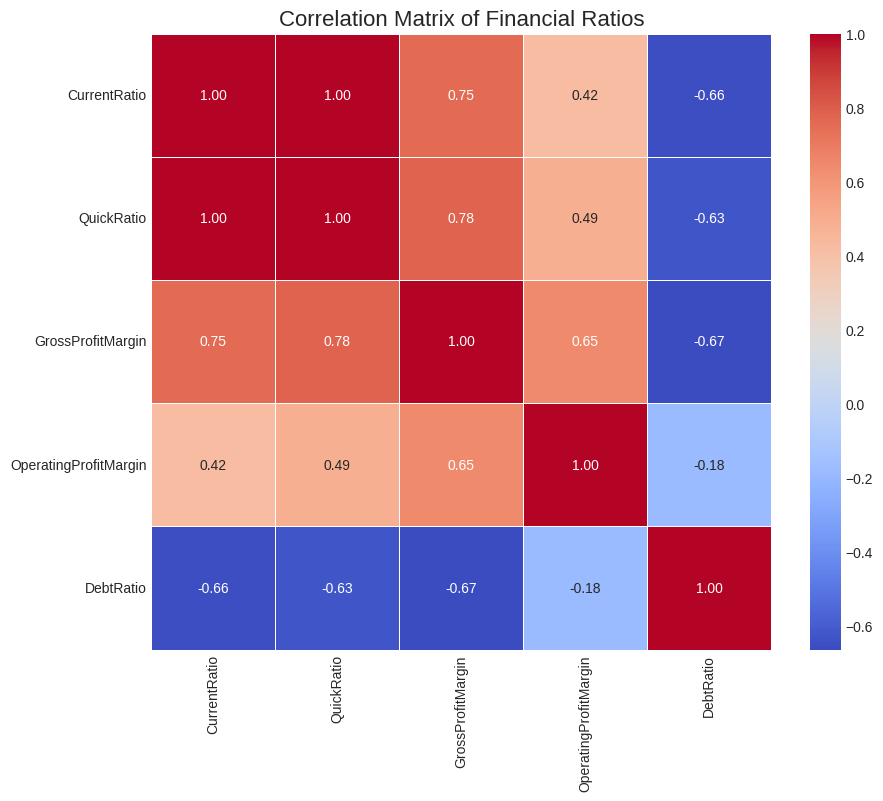

✅ EDA 및 시각화가 완료되었습니다.


In [3]:
# 'Date' 컬럼을 날짜 형식으로 변환
all_ratios_df['Date'] = pd.to_datetime(all_ratios_df['Date'])

# 1. 기업별 재무 비율 추이 시각화
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
sns.lineplot(data=all_ratios_df, x='Date', y='DebtRatio', hue='Ticker', marker='o')
plt.title('Debt Ratio Over Time by Company', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Debt Ratio', fontsize=12)
plt.legend(title='Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 재무 비율 간의 상관관계 분석
plt.figure(figsize=(10, 8))
# Ticker가 인덱스에 포함되지 않도록 재설정
corr_df = all_ratios_df.drop(columns=['Ticker', 'Date']).corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Financial Ratios', fontsize=16)
plt.show()

print("✅ EDA 및 시각화가 완료되었습니다.")